In [94]:
import xarray as xr
import geopandas as gpd
import rioxarray  # Importing rioxarray for clipping
from shapely.geometry import mapping  # Importing mapping function

# Step 1: Open the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_MERRA2.nc', engine='netcdf4')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_Country_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Set CRS for the data variable
nc_data.rio.write_crs(nc_crs, inplace=True)

# Step 4: Clip the NetCDF data using the shapefile
nc_data_clipped = nc_data.rio.clip(india_shape.geometry.apply(mapping), crs=nc_crs)

# Step 5: Save the clipped data to a new NetCDF file
output_file = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc'
nc_data_clipped.to_netcdf(output_file)


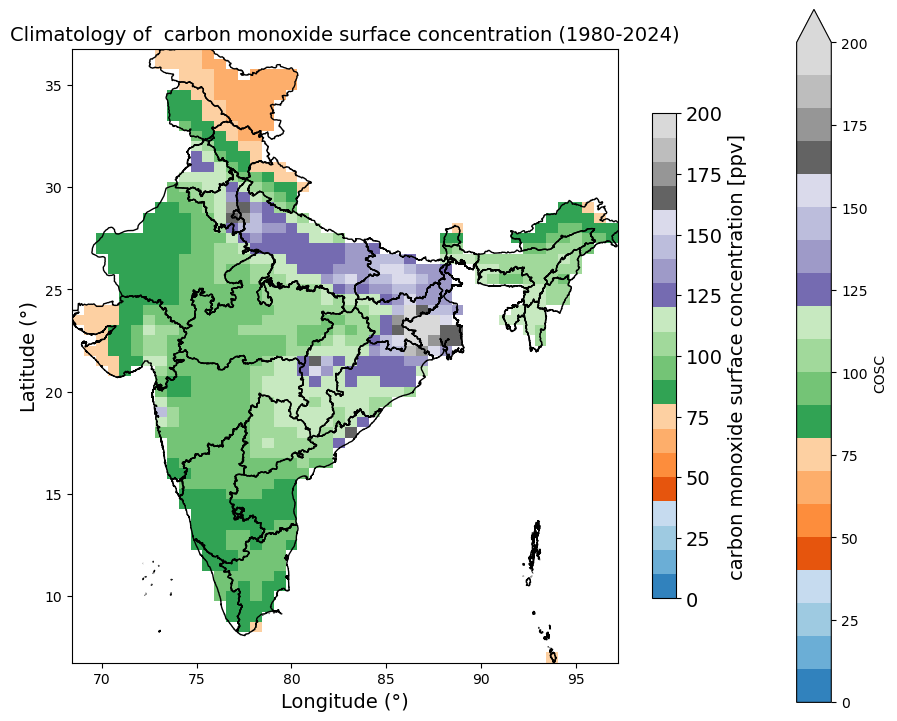

In [26]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')
lat_range = slice(7, 42)  # Latitude range from 8 to 38
lon_range = slice(66, 99)  # Longitude range from 67 to 98



# Subset the data within the specified latitude and longitude range
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Calculate the time mean
time_mean_subset = subset_data.mean(dim='time')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the subset data
plt.figure(figsize=(11, 9))
plot = time_mean_subset.plot(cmap='tab20c', vmin=0, vmax=200)

# Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add colorbar with smaller size and set the label
cbar = plt.colorbar(plot, shrink=0.7)
cbar.set_label('carbon monoxide surface concentration [ppv]', fontsize=14)  # Set label text size

# Set color bar label text size
cbar.ax.tick_params(labelsize=14)  # Set label text size

# Add title and labels
plt.title('Climatology of  carbon monoxide surface concentration (1980-2024)', fontsize=14)  # Increase title font size
plt.xlabel('Longitude (°)', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Latitude (°)', fontsize=14)  # Increase y-axis label font size

# Show plot
plt.show()


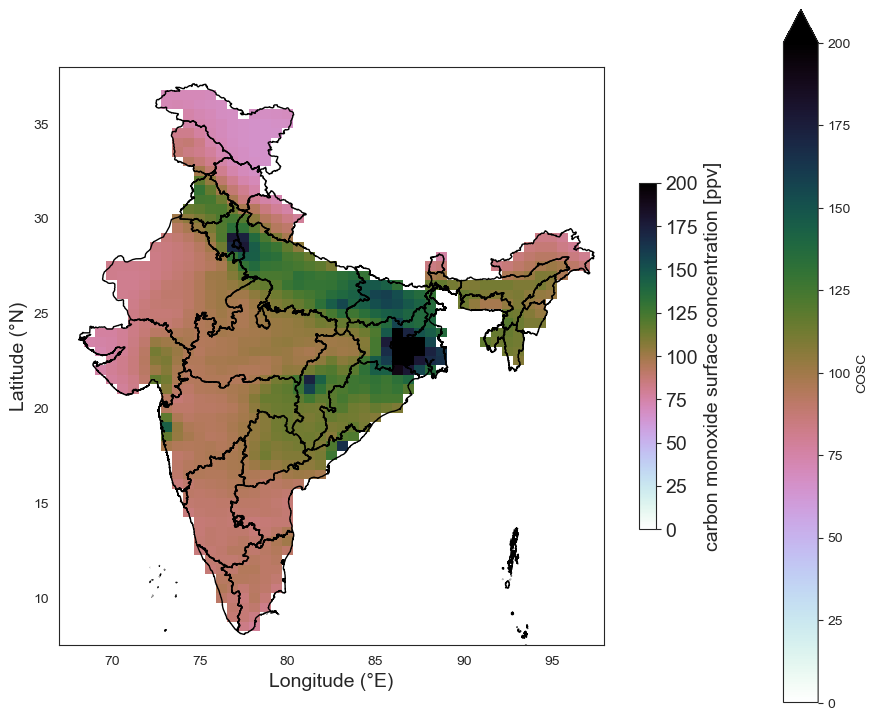

In [96]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define latitude and longitude ranges
lat_min, lat_max = 7.5, 38
lon_min, lon_max = 67, 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['COSC'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Calculate the time mean
time_mean_subset = subset_data.mean(dim='time')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the subset data
plt.figure(figsize=(11, 9))
plot = time_mean_subset.plot(cmap='cubehelix_r', vmin=0, vmax=200)

# Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add colorbar with smaller size and set the label
cbar = plt.colorbar(plot, shrink=0.5)
cbar.set_label('carbon monoxide surface concentration [ppv]', fontsize=14)  # Set label text size

# Set color bar label text size
cbar.ax.tick_params(labelsize=14)  # Set label text size

# Set plot limits to ensure the entire shapefile is visible
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
# Add title and labels
plt.title('', fontsize=14)  # Increase title font size
plt.xlabel('Longitude (°E)', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Latitude (°N)', fontsize=14)  # Increase y-axis label font size

# Show plot
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

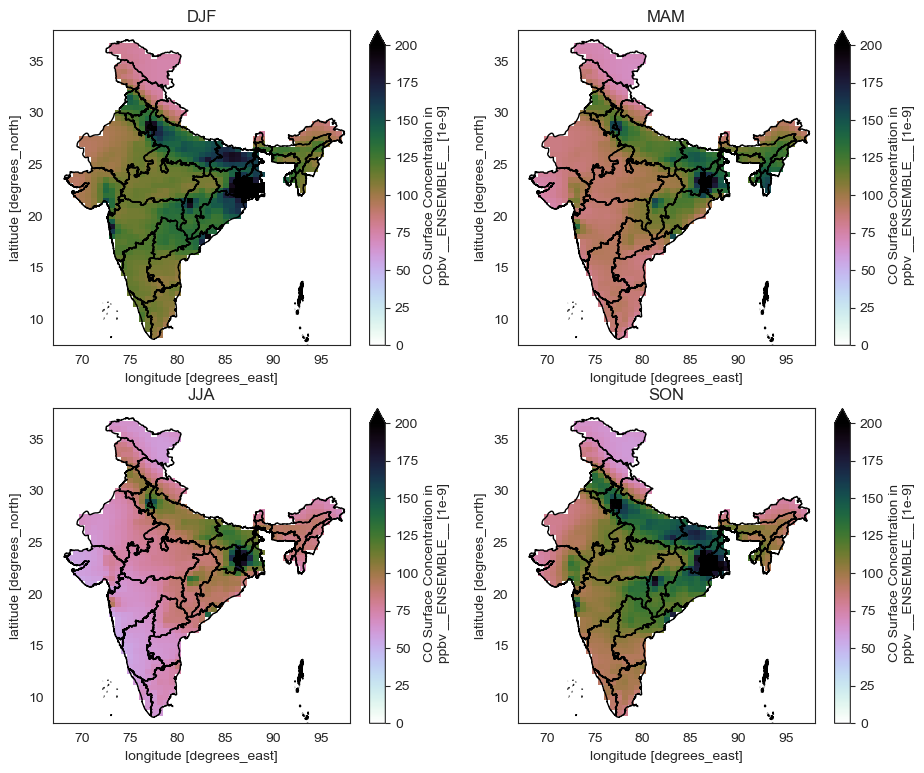

In [97]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define latitude and longitude ranges
lat_min, lat_max = 7.5, 38
lon_min, lon_max = 67, 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['COSC'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Step 2: Calculate the seasonal mean
seasonal_mean = subset_data.groupby('time.season').mean(dim='time')

# Step 3: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 4: Plot the seasonal mean data
plt.figure(figsize=(11, 9))

# Define colormap
cmap = 'cubehelix_r'

# Define seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Loop through each season and plot
for i, season in enumerate(seasons, 1):
    plt.subplot(2, 2, i)
    seasonal_mean.sel(season=season).plot(cmap=cmap, vmin=0, vmax=200)
    
    # Overlay the reprojected shapefile
    india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)
    
    # Set plot limits to ensure the entire shapefile is visible
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)
    
    # Add title
    plt.title(season)

# Add colorbar with smaller size and set the label
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('carbon monoxide surface concentration [ppv]', fontsize=14)  # Set label text size

# Set color bar label text size
cbar.ax.tick_params(labelsize=14)  # Set label text size

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [99]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette
import numpy as np

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Group data into decades
decades = annual_mean_collapsed['year'] // 10 * 10
annual_mean_collapsed['decade'] = decades

# Get unique decade values
unique_decades = np.unique(decades)

# Define a color palette for each decade
# Define colors with transparency
colors = ['green', 'orange', 'red', 'blue', 'pink']
alpha = 0.1  # Set the transparency level, 0 being fully transparent and 1 being fully opaque
palette = sns.color_palette([(r, g, b, alpha) for (r, g, b) in sns.color_palette(colors)])


# Plot violin plots for each decade with different colors
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid", {'grid.linestyle': '', 'axes.grid': True, 'axes.grid.axis': 'x'})  # Set seaborn style without y-axis gridlines
sns.violinplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='decade', y='COSC', palette=palette)
plt.title('', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('CO surface concentration [ppv]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.ylim(80, 160)
plt.show()


TypeError: float() argument must be a string or a real number, not 'ellipsis'

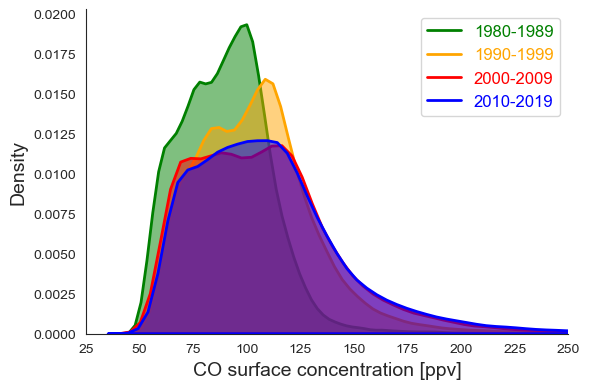

In [100]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Define decades
decades = range(1980, 2020, 10)

# Set colors for each decade
colors = ['green', 'orange', 'red', 'blue']

# Plot probability distribution curves for each decade
fig, ax = plt.subplots(figsize=(6, 4))

# Lists to store legend handles and labels
legend_handles = []

# KDE for each decade with shaded areas
for i, decade_start in enumerate(decades):
    decade_data = subset_data.sel(time=slice(f'{decade_start}-01-01', f'{decade_start + 9}-12-31'))
    data = decade_data.values.flatten()
    kde_line = sns.kdeplot(data, ax=ax, linewidth=2, fill=True, alpha=0.5, color=colors[i], label=f'{decade_start}-{decade_start + 9}')
    
    # Add separate line for each decade
    plt.plot([], [], color=colors[i], linewidth=2)
    
    # Create proxy artist for legend
    legend_handles.append(Line2D([0], [0], color=colors[i], linewidth=2))

# Set plot aesthetics
ax.set_title('', fontsize=16)
ax.set_xlabel('CO surface concentration [ppv]', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.grid(True, linestyle='-', alpha=1)
ax.grid(False)  # Remove gridlines
# Set x-axis limits
plt.xlim(25, 250)

# Show legend
legend = plt.legend(handles=legend_handles, labels=[f'{decade}-{decade + 9}' for decade in decades], fontsize=12)

# Set legend text color to match line color
for text, color in zip(legend.get_texts(), colors):
    text.set_color(color)

# Beautify the plot
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()


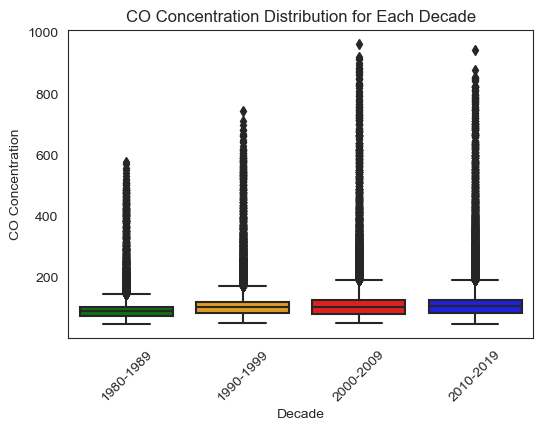

In [122]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Define decades
decades = range(1980, 2020, 10)

# Prepare data for plotting
data_list = []
for i, decade in enumerate(decades):
    start_year = decade
    end_year = decade + 9
    subset_decade = subset_data.sel(time=slice(str(start_year), str(end_year))).values.flatten()
    data_list.append({'Decade': f'{start_year}-{end_year}', 'CO Concentration': subset_decade, 'Color': i})

# Combine data into a single DataFrame
import pandas as pd
df = pd.DataFrame()
for data in data_list:
    df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

# Plot box plots for each decade
plt.figure(figsize=(6, 4))
sns.boxplot(x='Decade', y='CO Concentration', data=df, palette=['green', 'orange', 'red', 'blue'])
plt.title('CO Concentration Distribution for Each Decade')
plt.xlabel('Decade')
plt.ylabel('CO Concentration')
plt.xticks(rotation=45)
plt.show()


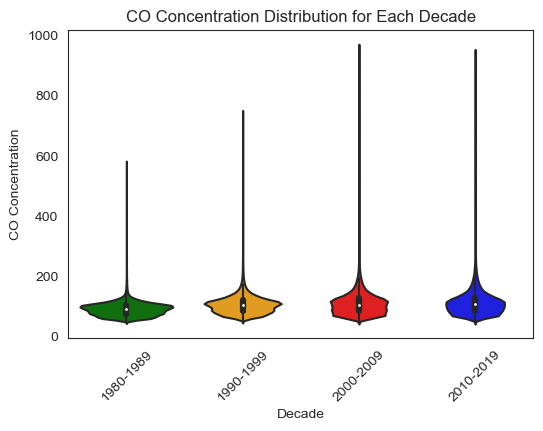

In [121]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Define decades
decades = range(1980, 2020, 10)

# Prepare data for plotting
data_list = []
for i, decade in enumerate(decades):
    start_year = decade
    end_year = decade + 9
    subset_decade = subset_data.sel(time=slice(str(start_year), str(end_year))).values.flatten()
    data_list.append({'Decade': f'{start_year}-{end_year}', 'CO Concentration': subset_decade, 'Color': i})

# Combine data into a single DataFrame
import pandas as pd
df = pd.DataFrame()
for data in data_list:
    df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

# Plot violin plots for each decade
plt.figure(figsize=(6, 4))
sns.violinplot(x='Decade', y='CO Concentration', data=df, palette=['green', 'orange', 'red', 'blue'])
plt.title('CO Concentration Distribution for Each Decade')
plt.xlabel('Decade')
plt.ylabel('CO Concentration')
plt.xticks(rotation=45)
plt.show()


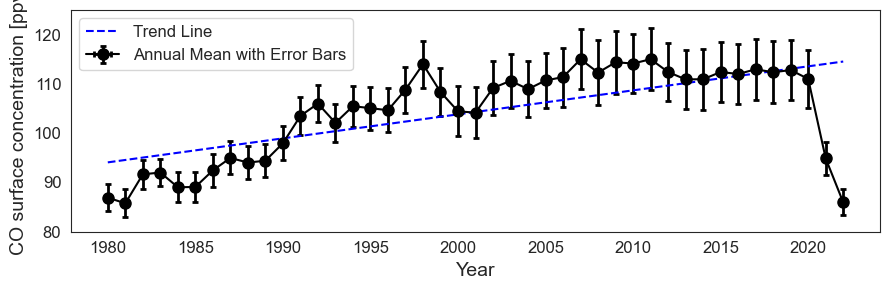

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2024
subset_data = subset_data.sel(time=slice('1980-01-01', '2023-01-01'))

# Resample the data to annual frequency
annual_data = subset_data.resample(time='1Y').mean()

# Calculate annual mean and standard error
annual_mean = annual_data.mean(dim=('lat', 'lon'))
annual_std_err = annual_data.std(dim=('lat', 'lon')) / np.sqrt(len(annual_data))

# Sample data
x = np.arange(1980, 2023)  # Assuming 45 years of data
y = annual_mean.values  # Your annual mean data
xerr = 0  # You can set your own x error or leave it as 0
yerr = annual_std_err.values  # Your annual standard error data

# Fit a polynomial regression line
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
trend_line = np.poly1d(coefficients)

# Plot
plt.figure(figsize=(9, 3))
sns.set_style("white")  # Set seaborn style for better aesthetics

# Plot with error bars
plt.errorbar(x, y,
             xerr=xerr,
             yerr=yerr,
             fmt='-o',
             color='black',  # Line color
             ecolor='black',  # Error bar color
             capsize=2,  # Size of error bar caps
             elinewidth=2,  # Width of error bar lines
             capthick=2,  # Thickness of error bar caps
             markersize=8,  # Size of markers
             label='Annual Mean with Error Bars')

# Plot trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO surface concentration [ppv]', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2023, 5), fontsize=12)
plt.yticks(fontsize=12)

# Set ymin and ymax for y-axis
plt.ylim(80, 125)

# Show plot
plt.tight_layout()
plt.show()



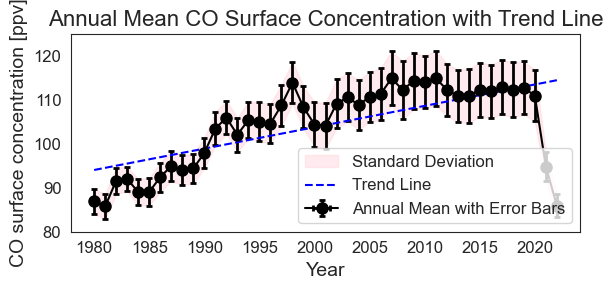

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2024
subset_data = subset_data.sel(time=slice('1980-01-01', '2023-01-01'))

# Resample the data to annual frequency
annual_data = subset_data.resample(time='1Y').mean()

# Calculate annual mean and standard error
annual_mean = annual_data.mean(dim=('lat', 'lon'))
annual_std_err = annual_data.std(dim=('lat', 'lon')) / np.sqrt(len(annual_data))

# Sample data
x = np.arange(1980, 2023)  # Assuming 45 years of data
y = annual_mean.values  # Your annual mean data
xerr = 0  # You can set your own x error or leave it as 0
yerr = annual_std_err.values  # Your annual standard error data

# Fit a polynomial regression line
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
trend_line = np.poly1d(coefficients)

# Plot
plt.figure(figsize=(6, 3))
sns.set_style("white")  # Set seaborn style for better aesthetics

# Plot with error bars
plt.errorbar(x, y,
             xerr=xerr,
             yerr=yerr,
             fmt='-o',
             color='black',  # Line color
             ecolor='black',  # Error bar color
             capsize=2,  # Size of error bar caps
             elinewidth=2,  # Width of error bar lines
             capthick=2,  # Thickness of error bar caps
             markersize=8,  # Size of markers
             label='Annual Mean with Error Bars')

# Convert to numpy arrays and squeeze if necessary
x = np.squeeze(x)
annual_mean = np.squeeze(annual_mean.values)
data_std = np.squeeze(annual_std_err.values)

# Plot standard deviation as shaded region
plt.fill_between(x, annual_mean - data_std, annual_mean + data_std, color='pink', alpha=0.3, label='Standard Deviation')

# Plot trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('Annual Mean CO Surface Concentration with Trend Line', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('COSC', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2023, 5), fontsize=12)
plt.yticks(fontsize=12)

# Set ymin and ymax for y-axis
plt.ylim(80, 125)

# Show plot
plt.tight_layout()
plt.show()


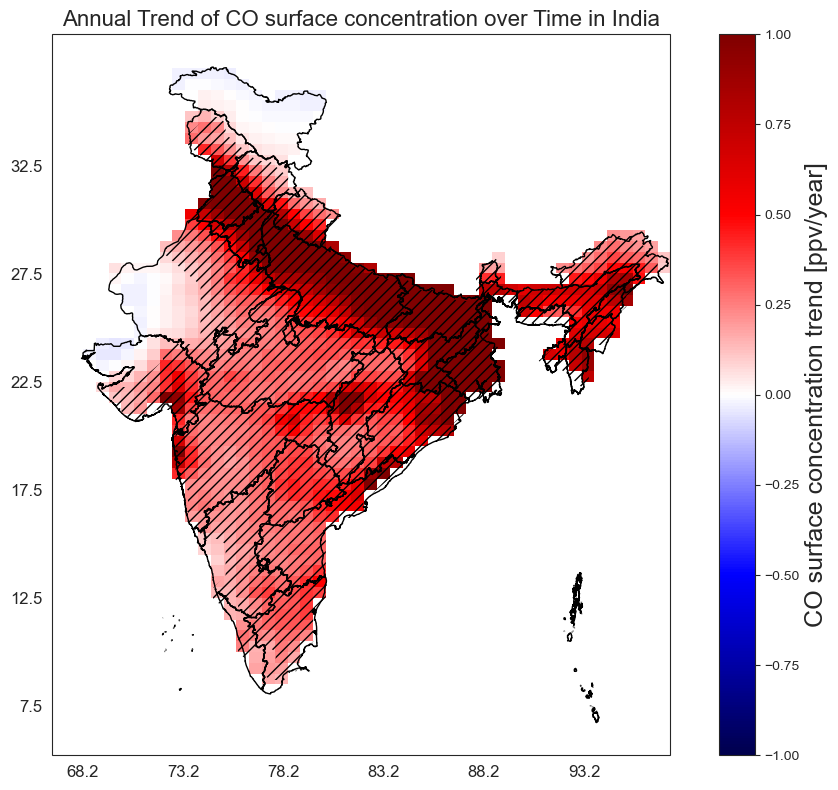

In [172]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(7.5, 37)  # Latitude range for India
lon_range = slice(68.2, 97.5)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Calculate annual mean from monthly data
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Extract latitude and longitude coordinates
latitudes = annual_mean['lat'].values
longitudes = annual_mean['lon'].values

# Extract time coordinate
years = annual_mean['year']

# Create arrays to store the slope and p-values of each grid point
slope_values = np.zeros((len(latitudes), len(longitudes)))
p_values = np.zeros((len(latitudes), len(longitudes)))

# Calculate linear trend and p-values at each grid point
for i, lat in enumerate(latitudes):
    for j, lon in enumerate(longitudes):
        slope, _, _, p_value, _ = stats.linregress(years, annual_mean['COSC'][:, i, j])
        slope_values[i, j] = slope
        p_values[i, j] = p_value

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'
# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the slope values
im = ax.imshow(slope_values, cmap='seismic', extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower', vmin=-1, vmax=1)

# Overlay India shapefile
india_shape.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Hatch significant regions (p < 0.05)
sig_regions = np.where(p_values < 0.05, 1, 0)
ax.contourf(longitudes, latitudes, sig_regions, levels=[0, 0.5, 1], colors='none', hatches=['', '///'], alpha=0)

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('CO surface concentration trend [ppv/year]', fontsize=18)

# Increase tick label font size and add lat lon tick marks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(lon_range.start, lon_range.stop, 5))
ax.set_yticks(np.arange(lat_range.start, lat_range.stop, 5))

# Add title
ax.set_title('Annual Trend of CO surface concentration over Time in India', fontsize=16)

plt.tight_layout()
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_14308\1462565633.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


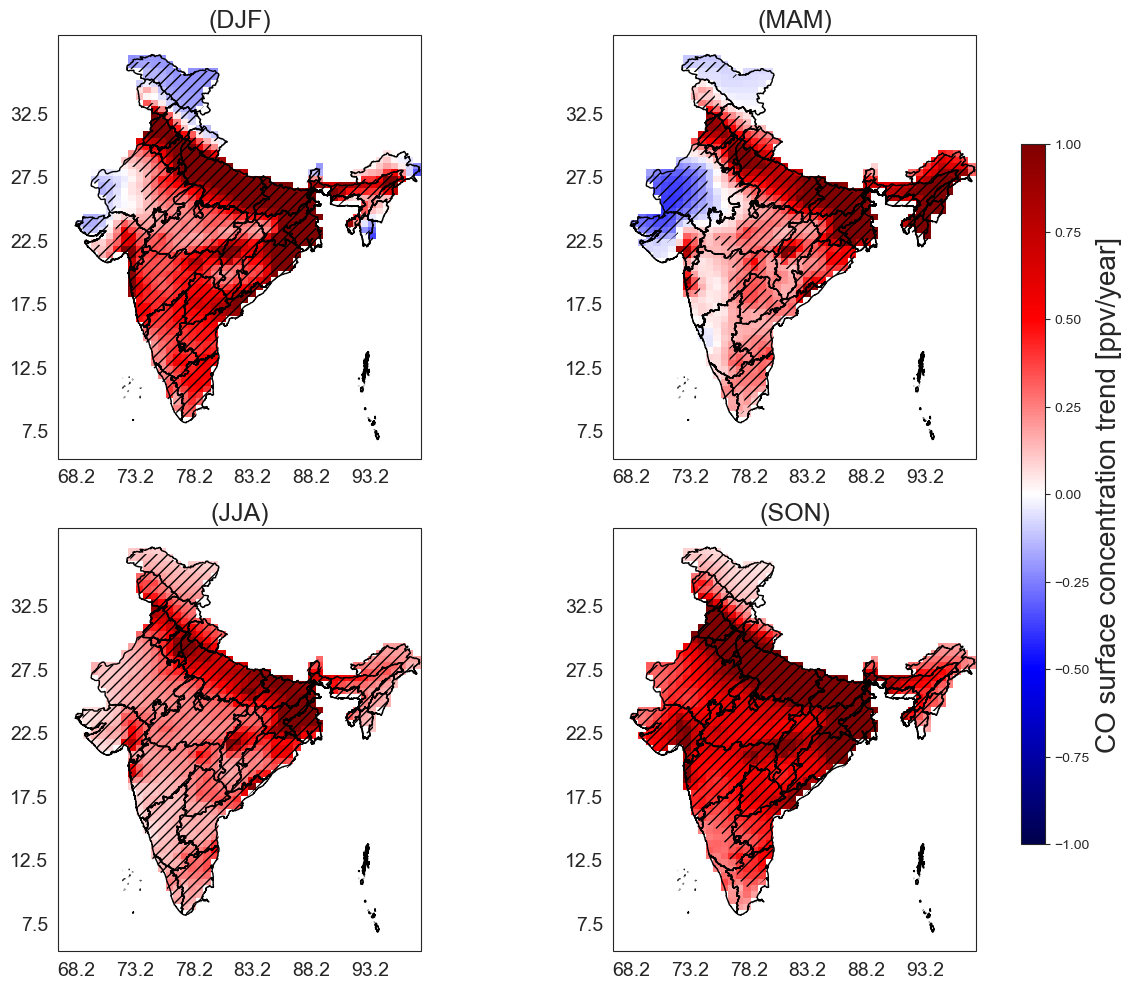

In [171]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(7.5, 37)  # Latitude range for India
lon_range = slice(68.2, 97.5)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Extract latitude and longitude coordinates
latitudes = subset_data['lat'].values
longitudes = subset_data['lon'].values

# Extract time coordinate
time = subset_data['time']

# Define seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Create arrays to store the slope and p-values of each grid point for each season
seasonal_slope_values = np.zeros((len(seasons), len(latitudes), len(longitudes)))
p_values = np.zeros((len(seasons), len(latitudes), len(longitudes)))

# Calculate linear trend for each season at each grid point
for i, season in enumerate(seasons):
    # Extract data for the current season
    season_data = subset_data.sel(time=subset_data['time.season'] == season)
    pm25_values = season_data['COSC'].values
    
    # Convert time to years (assuming time is in days since a reference date)
    time_years = (season_data['time'] - season_data['time'][0]) / np.timedelta64(1, 'D') / 365.25
    
    # Calculate linear trend and p-values at each grid point for the current season
    for j in range(len(latitudes)):
        for k in range(len(longitudes)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(time_years, pm25_values[:, j, k])
            seasonal_slope_values[i, j, k] = slope
            p_values[i, j, k] = p_value

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'
india_shape = india_shape.to_crs(nc_crs)

# Plotting the seasonal trend with the shapefile overlay
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Define position for the colorbar

for i, season in enumerate(seasons):
    ax = axes.flatten()[i]
    im = ax.imshow(seasonal_slope_values[i], cmap='seismic', extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower', vmin=-1, vmax=1)
    #cbar = plt.colorbar(im, extend='both')  # or extend='neither' depending on your preference
    ax.set_title(f'({season})', fontsize=18)
    #ax.coastlines()
    
    # Overlay India shapefile
    india_shape.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
    
    # Hatch significant regions (p < 0.05)
    sig_regions = np.where(p_values[i] < 0.05, 1, 0)
    ax.contourf(longitudes, latitudes, sig_regions, levels=[0, 0.5, 1], colors='none', hatches=['', '///'], alpha=0)
    
        # Increase tick label font size and add lat lon tick marks
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(np.arange(lon_range.start, lon_range.stop, 5))
    ax.set_yticks(np.arange(lat_range.start, lat_range.stop, 5))

# Add colorbar
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
cbar.set_label('CO surface concentration trend [ppv/year]', fontsize=18)

# Increase colorbar label font size
cbar.ax.yaxis.label.set_fontsize(20)

plt.tight_layout()
plt.show()


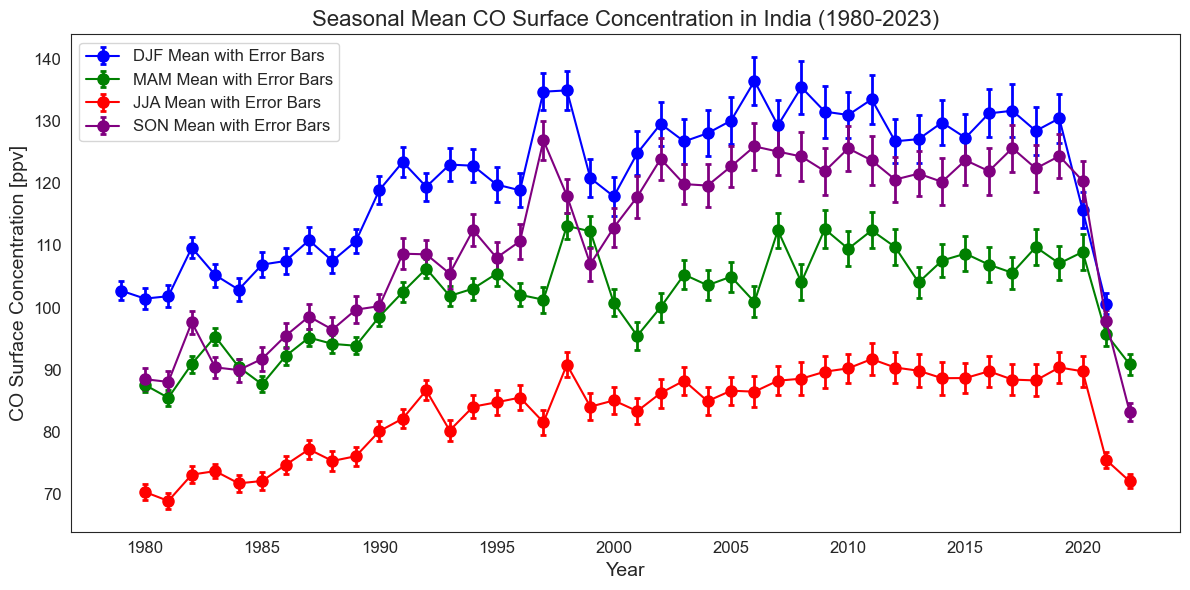

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define the latitude and longitude ranges
lat_range = slice(8, 37)  # Example latitude range, adjust as necessary
lon_range = slice(68, 97)  # Example longitude range, adjust as necessary

# Extract the subset of data
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2023
subset_data = subset_data.sel(time=slice('1980-01-01', '2023-01-01'))

# Resample the data to seasonal frequency
seasonal_data = subset_data.resample(time='QS-DEC').mean()

# Calculate seasonal mean and standard error
seasonal_mean = seasonal_data.mean(dim=('lat', 'lon'))
seasonal_std_err = seasonal_data.std(dim=('lat', 'lon')) / np.sqrt(seasonal_data.sizes['time'])

# Prepare data for plotting
seasons = ['DJF', 'MAM', 'JJA', 'SON']
colors = ['blue', 'green', 'red', 'purple']

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("white")  # Set seaborn style for better aesthetics

for i, season in enumerate(seasons):
    season_data = seasonal_mean.sel(time=seasonal_mean['time.season'] == season)
    x = season_data['time.year'].values
    y = season_data.values
    yerr = seasonal_std_err.sel(time=seasonal_std_err['time.season'] == season).values
    
    plt.errorbar(x, y,
                 yerr=yerr,
                 fmt='-o',
                 color=colors[i],
                 ecolor=colors[i],
                 capsize=2,
                 elinewidth=2,
                 capthick=2,
                 markersize=8,
                 label=f'{season} Mean with Error Bars')

# Add title and labels
plt.title('Seasonal Mean CO Surface Concentration in India (1980-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO Surface Concentration [ppv]', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2024, 5), fontsize=12)
plt.yticks(fontsize=12)

# Optionally, set ymin and ymax for y-axis if needed
# plt.ylim(80, 125)

# Show plot
plt.tight_layout()
plt.show()


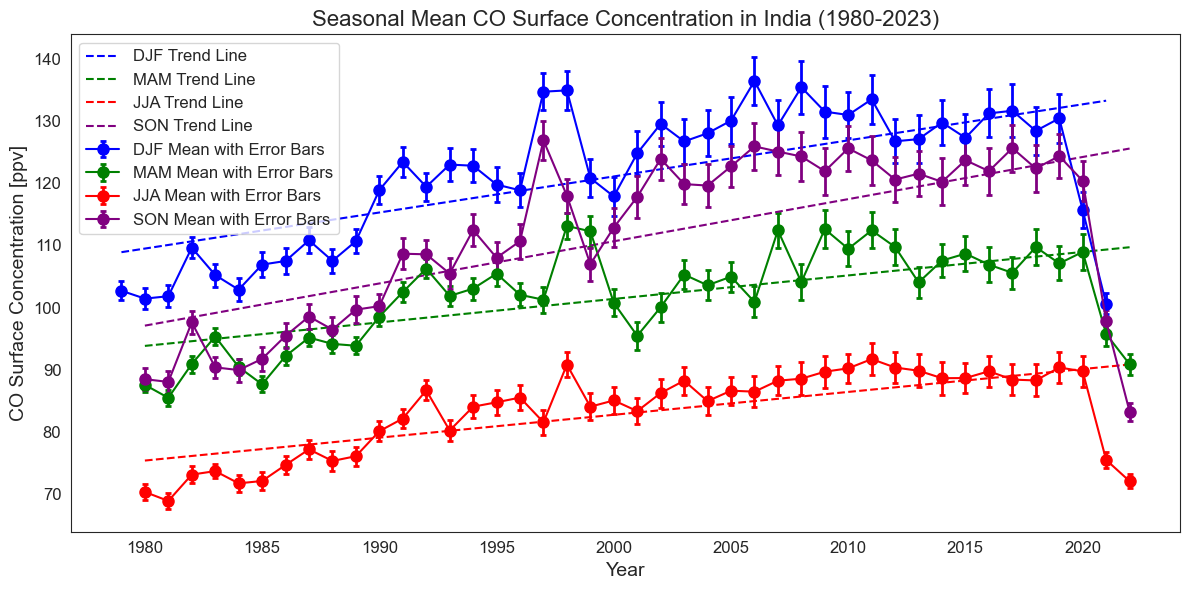

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define the latitude and longitude ranges
lat_range = slice(8, 37)  # Example latitude range, adjust as necessary
lon_range = slice(68, 97)  # Example longitude range, adjust as necessary

# Extract the subset of data
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2023
subset_data = subset_data.sel(time=slice('1980-01-01', '2023-01-01'))

# Resample the data to seasonal frequency
seasonal_data = subset_data.resample(time='QS-DEC').mean()

# Calculate seasonal mean and standard error
seasonal_mean = seasonal_data.mean(dim=('lat', 'lon'))
seasonal_std_err = seasonal_data.std(dim=('lat', 'lon')) / np.sqrt(seasonal_data.sizes['time'])

# Prepare data for plotting
seasons = ['DJF', 'MAM', 'JJA', 'SON']
colors = ['blue', 'green', 'red', 'purple']

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("white")  # Set seaborn style for better aesthetics

for i, season in enumerate(seasons):
    season_data = seasonal_mean.sel(time=seasonal_mean['time.season'] == season)
    x = season_data['time.year'].values
    y = season_data.values
    yerr = seasonal_std_err.sel(time=seasonal_std_err['time.season'] == season).values
    
    # Plot seasonal data with error bars
    plt.errorbar(x, y,
                 yerr=yerr,
                 fmt='-o',
                 color=colors[i],
                 ecolor=colors[i],
                 capsize=2,
                 elinewidth=2,
                 capthick=2,
                 markersize=8,
                 label=f'{season} Mean with Error Bars')
    
    # Fit a linear trend line
    coefficients = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coefficients)
    
    # Plot trend line
    plt.plot(x, trend_line(x), color=colors[i], linestyle='--', label=f'{season} Trend Line')

# Add title and labels
plt.title('Seasonal Mean CO Surface Concentration in India (1980-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO Surface Concentration [ppv]', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2024, 5), fontsize=12)
plt.yticks(fontsize=12)

# Optionally, set ymin and ymax for y-axis if needed
# plt.ylim(80, 125)

# Show plot
plt.tight_layout()
plt.show()


Slope for DJF: 0.5793
Slope for MAM: 0.3773
Slope for JJA: 0.3674
Slope for SON: 0.6772


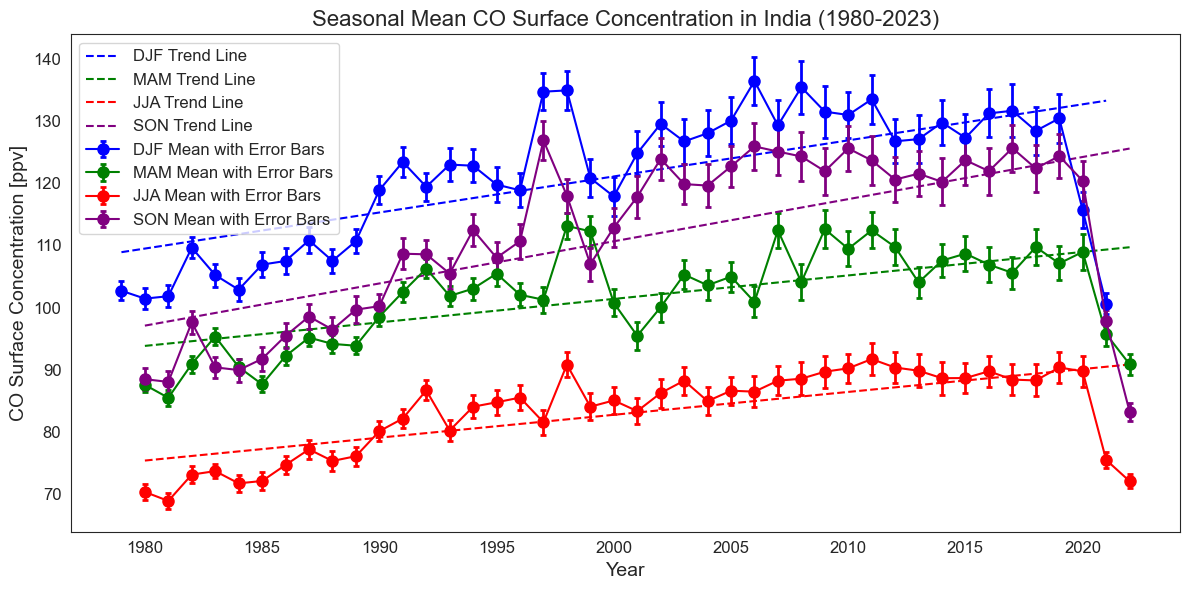

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define the latitude and longitude ranges
lat_range = slice(8, 37)  # Example latitude range, adjust as necessary
lon_range = slice(68, 97)  # Example longitude range, adjust as necessary

# Extract the subset of data
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2023
subset_data = subset_data.sel(time=slice('1980-01-01', '2023-01-01'))

# Resample the data to seasonal frequency
seasonal_data = subset_data.resample(time='QS-DEC').mean()

# Calculate seasonal mean and standard error
seasonal_mean = seasonal_data.mean(dim=('lat', 'lon'))
seasonal_std_err = seasonal_data.std(dim=('lat', 'lon')) / np.sqrt(seasonal_data.sizes['time'])

# Prepare data for plotting
seasons = ['DJF', 'MAM', 'JJA', 'SON']
colors = ['blue', 'green', 'red', 'purple']

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("white")  # Set seaborn style for better aesthetics

for i, season in enumerate(seasons):
    season_data = seasonal_mean.sel(time=seasonal_mean['time.season'] == season)
    x = season_data['time.year'].values
    y = season_data.values
    yerr = seasonal_std_err.sel(time=seasonal_std_err['time.season'] == season).values
    
    # Plot seasonal data with error bars
    plt.errorbar(x, y,
                 yerr=yerr,
                 fmt='-o',
                 color=colors[i],
                 ecolor=colors[i],
                 capsize=2,
                 elinewidth=2,
                 capthick=2,
                 markersize=8,
                 label=f'{season} Mean with Error Bars')
    
    # Fit a linear trend line
    coefficients = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coefficients)
    
    # Print slope of the trend line
    slope = coefficients[0]
    print(f'Slope for {season}: {slope:.4f}')
    
    # Plot trend line
    plt.plot(x, trend_line(x), color=colors[i], linestyle='--', label=f'{season} Trend Line')

# Add title and labels
plt.title('Seasonal Mean CO Surface Concentration in India (1980-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO Surface Concentration [ppv]', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2024, 5), fontsize=12)
plt.yticks(fontsize=12)

# Optionally, set ymin and ymax for y-axis if needed
# plt.ylim(80, 125)

# Show plot
plt.tight_layout()
plt.show()


Slope for DJF: 0.5793
Slope for MAM: 0.3773
Slope for JJA: 0.3674
Slope for SON: 0.6772


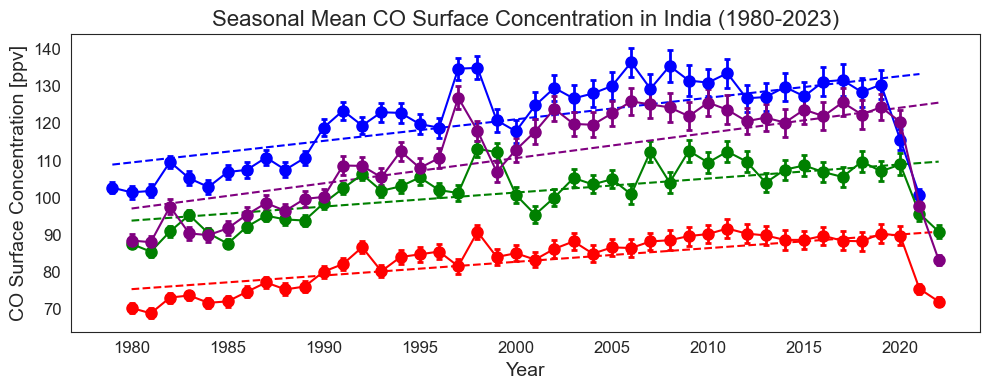

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define the latitude and longitude ranges
lat_range = slice(8, 37)  # Example latitude range, adjust as necessary
lon_range = slice(68, 97)  # Example longitude range, adjust as necessary

# Extract the subset of data
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2023
subset_data = subset_data.sel(time=slice('1980-01-01', '2023-01-01'))

# Resample the data to seasonal frequency
seasonal_data = subset_data.resample(time='QS-DEC').mean()

# Calculate seasonal mean and standard error
seasonal_mean = seasonal_data.mean(dim=('lat', 'lon'))
seasonal_std_err = seasonal_data.std(dim=('lat', 'lon')) / np.sqrt(seasonal_data.sizes['time'])

# Prepare data for plotting
seasons = ['DJF', 'MAM', 'JJA', 'SON']
colors = ['blue', 'green', 'red', 'purple']

# Plot
plt.figure(figsize=(10, 4))
sns.set_style("white")  # Set seaborn style for better aesthetics

for i, season in enumerate(seasons):
    season_data = seasonal_mean.sel(time=seasonal_mean['time.season'] == season)
    x = season_data['time.year'].values
    y = season_data.values
    yerr = seasonal_std_err.sel(time=seasonal_std_err['time.season'] == season).values
    
    # Plot seasonal data with error bars
    plt.errorbar(x, y,
                 yerr=yerr,
                 fmt='-o',
                 color=colors[i],
                 ecolor=colors[i],
                 capsize=2,
                 elinewidth=2,
                 capthick=2,
                 markersize=8,
                 label=f'{season} Mean with Error Bars')
    
    # Fit a linear trend line
    coefficients = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coefficients)
    
    # Print slope of the trend line
    slope = coefficients[0]
    print(f'Slope for {season}: {slope:.4f}')
    
    # Plot trend line
    plt.plot(x, trend_line(x), color=colors[i], linestyle='--')

# Add title and labels
plt.title('Seasonal Mean CO Surface Concentration in India (1980-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO Surface Concentration [ppv]', fontsize=14)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2024, 5), fontsize=12)
plt.yticks(fontsize=12)

# Optionally, set ymin and ymax for y-axis if needed
# plt.ylim(80, 125)

# Show plot
plt.tight_layout()
plt.show()


The slope of the trend line is: 0.48685523297843714


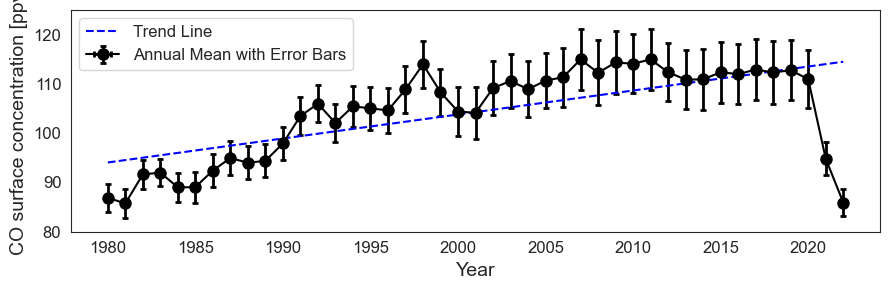

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Define your latitude and longitude ranges here
lat_range = slice(-90, 90)  # Example range, adjust as needed
lon_range = slice(-180, 180)  # Example range, adjust as needed

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2024
subset_data = subset_data.sel(time=slice('1980-01-01', '2023-01-01'))

# Resample the data to annual frequency
annual_data = subset_data.resample(time='1Y').mean()

# Calculate annual mean and standard error
annual_mean = annual_data.mean(dim=('lat', 'lon'))
annual_std_err = annual_data.std(dim=('lat', 'lon')) / np.sqrt(len(annual_data))

# Sample data
x = np.arange(1980, 2023)  # Assuming 43 years of data
y = annual_mean.values  # Your annual mean data
xerr = 0  # You can set your own x error or leave it as 0
yerr = annual_std_err.values  # Your annual standard error data

# Fit a polynomial regression line
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
trend_line = np.poly1d(coefficients)

# Print the slope of the trend line
slope = coefficients[0]
print(f"The slope of the trend line is: {slope}")

# Plot
plt.figure(figsize=(9, 3))
sns.set_style("white")  # Set seaborn style for better aesthetics

# Plot with error bars
plt.errorbar(x, y,
             xerr=xerr,
             yerr=yerr,
             fmt='-o',
             color='black',  # Line color
             ecolor='black',  # Error bar color
             capsize=2,  # Size of error bar caps
             elinewidth=2,  # Width of error bar lines
             capthick=2,  # Thickness of error bar caps
             markersize=8,  # Size of markers
             label='Annual Mean with Error Bars')

# Plot trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO surface concentration [ppv]', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2023, 5), fontsize=12)
plt.yticks(fontsize=12)

# Set ymin and ymax for y-axis
plt.ylim(80, 125)

# Show plot
plt.tight_layout()
plt.show()


The slope of the trend line is: 0.48685523297843714


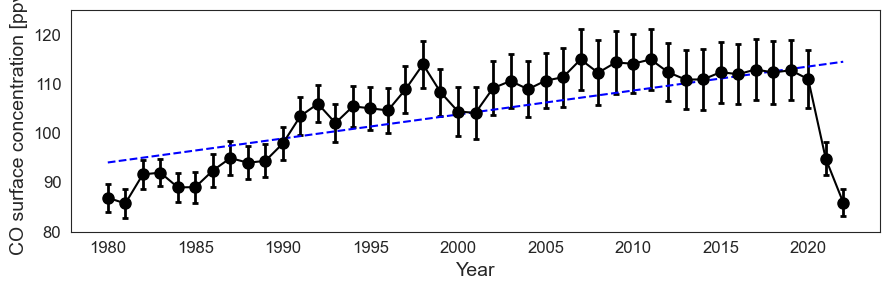

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Define your latitude and longitude ranges here
lat_range = slice(-90, 90)  # Example range, adjust as needed
lon_range = slice(-180, 180)  # Example range, adjust as needed

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2024
subset_data = subset_data.sel(time=slice('1980-01-01', '2023-01-01'))

# Resample the data to annual frequency
annual_data = subset_data.resample(time='1Y').mean()

# Calculate annual mean and standard error
annual_mean = annual_data.mean(dim=('lat', 'lon'))
annual_std_err = annual_data.std(dim=('lat', 'lon')) / np.sqrt(len(annual_data))

# Sample data
x = np.arange(1980, 2023)  # Assuming 43 years of data
y = annual_mean.values  # Your annual mean data
xerr = 0  # You can set your own x error or leave it as 0
yerr = annual_std_err.values  # Your annual standard error data

# Fit a polynomial regression line
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
trend_line = np.poly1d(coefficients)

# Print the slope of the trend line
slope = coefficients[0]
print(f"The slope of the trend line is: {slope}")

# Plot
plt.figure(figsize=(9, 3))
sns.set_style("white")  # Set seaborn style for better aesthetics

# Plot with error bars
plt.errorbar(x, y,
             xerr=xerr,
             yerr=yerr,
             fmt='-o',
             color='black',  # Line color
             ecolor='black',  # Error bar color
             capsize=2,  # Size of error bar caps
             elinewidth=2,  # Width of error bar lines
             capthick=2,  # Thickness of error bar caps
             markersize=8,  # Size of markers
             label='Annual Mean with Error Bars')

# Plot trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO surface concentration [ppv]', fontsize=14)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2023, 5), fontsize=12)
plt.yticks(fontsize=12)

# Set ymin and ymax for y-axis
plt.ylim(80, 125)

# Show plot
plt.tight_layout()
plt.show()


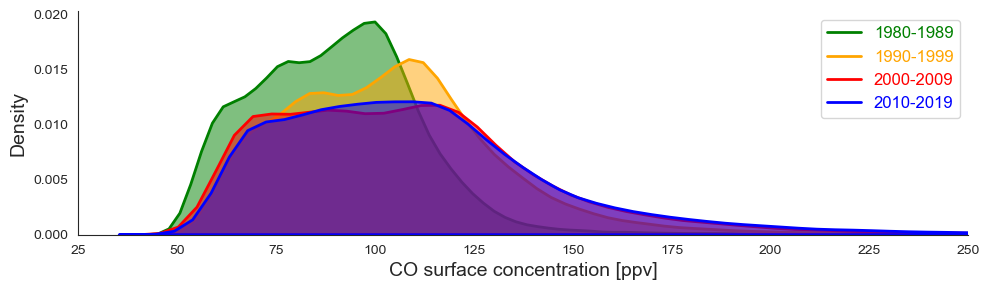

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Define decades
decades = range(1980, 2020, 10)

# Set colors for each decade
colors = ['green', 'orange', 'red', 'blue']

# Plot probability distribution curves for each decade
fig, ax = plt.subplots(figsize=(10, 3))

# Lists to store legend handles and labels
legend_handles = []

# KDE for each decade with shaded areas
for i, decade_start in enumerate(decades):
    decade_data = subset_data.sel(time=slice(f'{decade_start}-01-01', f'{decade_start + 9}-12-31'))
    data = decade_data.values.flatten()
    kde_line = sns.kdeplot(data, ax=ax, linewidth=2, fill=True, alpha=0.5, color=colors[i], label=f'{decade_start}-{decade_start + 9}')
    
    # Add separate line for each decade
    plt.plot([], [], color=colors[i], linewidth=2)
    
    # Create proxy artist for legend
    legend_handles.append(Line2D([0], [0], color=colors[i], linewidth=2))

# Set plot aesthetics
ax.set_title('', fontsize=16)
ax.set_xlabel('CO surface concentration [ppv]', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.grid(True, linestyle='-', alpha=1)
ax.grid(False)  # Remove gridlines
# Set x-axis limits
plt.xlim(25, 250)

# Show legend
legend = plt.legend(handles=legend_handles, labels=[f'{decade}-{decade + 9}' for decade in decades], fontsize=12)

# Set legend text color to match line color
for text, color in zip(legend.get_texts(), colors):
    text.set_color(color)

# Beautify the plot
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()


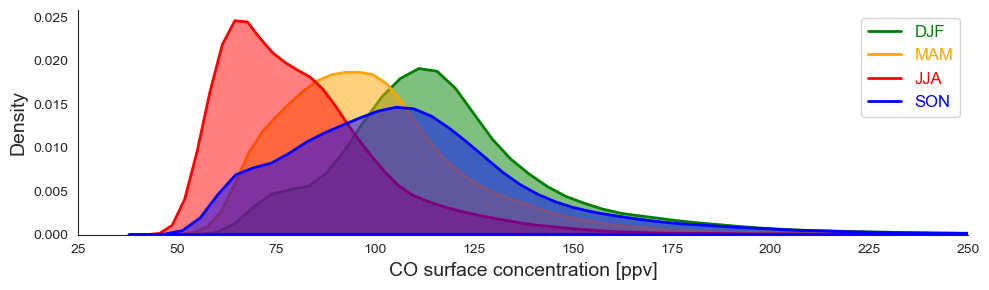

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/CO/CO_up2024_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['COSC'].sel(lat=lat_range, lon=lon_range)

# Define seasons
seasons = {
    'DJF': ['12-01', '01-01', '02-01'],
    'MAM': ['03-01', '04-01', '05-01'],
    'JJA': ['06-01', '07-01', '08-01'],
    'SON': ['09-01', '10-01', '11-01']
}

# Set colors for each season
colors = ['green', 'orange', 'red', 'blue']

# Plot probability distribution curves for each season
fig, ax = plt.subplots(figsize=(10, 3))

# Lists to store legend handles and labels
legend_handles = []

# KDE for each season with shaded areas
for i, (season, months) in enumerate(seasons.items()):
    season_data = subset_data.where(subset_data['time.month'].isin([int(month[:2]) for month in months]), drop=True)
    data = season_data.values.flatten()
    kde_line = sns.kdeplot(data, ax=ax, linewidth=2, fill=True, alpha=0.5, color=colors[i], label=season)
    
    # Add separate line for each season
    plt.plot([], [], color=colors[i], linewidth=2)
    
    # Create proxy artist for legend
    legend_handles.append(Line2D([0], [0], color=colors[i], linewidth=2))

# Set plot aesthetics
ax.set_title('', fontsize=16)
ax.set_xlabel('CO surface concentration [ppv]', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
# ax.grid(True, linestyle='-', alpha=1)
ax.grid(False)  # Remove gridlines
# Set x-axis limits
plt.xlim(25, 250)

# Show legend
legend = plt.legend(handles=legend_handles, labels=seasons.keys(), fontsize=12)

# Set legend text color to match line color
for text, color in zip(legend.get_texts(), colors):
    text.set_color(color)

# Beautify the plot
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
import os
import xarray as xr

# Directory containing the NetCDF files
directory = 'H:/CO_IND/TOTALS_emi_nc'

# List to hold individual datasets
datasets = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.startswith('v8.1_FT2022_AP_CO_') and filename.endswith('_TOTALS_emi.nc'):
        filepath = os.path.join(directory, filename)
        ds = xr.open_dataset(filepath)
        datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_dataset = xr.concat(datasets, dim='time')

# Save the combined dataset to a new NetCDF file
output_filepath = 'H:/CO_IND/TOTALS_emi_nc/combined_total_emi.nc'
combined_dataset.to_netcdf(output_filepath)

print(f'Combined NetCDF file saved to {output_filepath}')


Combined NetCDF file saved to H:/CO_IND/TOTALS_emi_nc/combined_total_emi.nc


In [12]:
import xarray as xr
import geopandas as gpd
import rioxarray  # Importing rioxarray for clipping
from shapely.geometry import mapping  # Importing mapping function

# Step 1: Open the NetCDF file
nc_data = xr.open_dataset('H:/CO_IND/TOTALS_emi_nc/combined_total_emi.nc', engine='netcdf4')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_Country_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Set CRS for the data variable
nc_data.rio.write_crs(nc_crs, inplace=True)

# Step 4: Clip the NetCDF data using the shapefile
nc_data_clipped = nc_data.rio.clip(india_shape.geometry.apply(mapping), crs=nc_crs)

# Step 5: Save the clipped data to a new NetCDF file
output_file = 'H:/CO_IND/TOTALS_emi_nc/combined_total_emi_clipped_data.nc'
nc_data_clipped.to_netcdf(output_file)

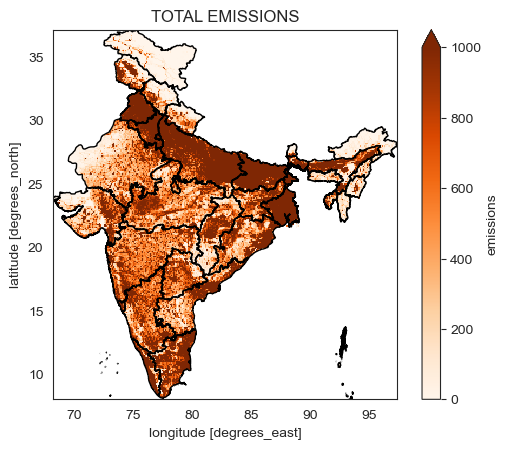

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# Step 1: Open the clipped NetCDF file
clipped_data = xr.open_dataset('H:/CO_IND/TOTALS_emi_nc/combined_total_emi_clipped_data.nc')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Extract the TOTAL_EMISSIONS variable
total_emissions = clipped_data['emissions']

# Step 4: Calculate the time mean of the emissions data
total_emissions_mean = total_emissions.mean(dim='time')

# Step 5: Slice the data along the latitude and longitude ranges
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98
total_emissions_sliced = total_emissions_mean.sel(lat=lat_range, lon=lon_range)

# Step 6: Plot the sliced TOTAL_EMISSIONS variable with a different colormap
fig, ax = plt.subplots()
im = total_emissions_sliced.plot(ax=ax, vmin=0, vmax=1000, cmap='Oranges')  # Setting vmin and vmax for color scale

# Add country boundaries in black color
india_shape.boundary.plot(ax=ax, linewidth=1, color='black')

# Set title with the unit for total emissions
ax.set_title('TOTAL EMISSIONS')

plt.show()


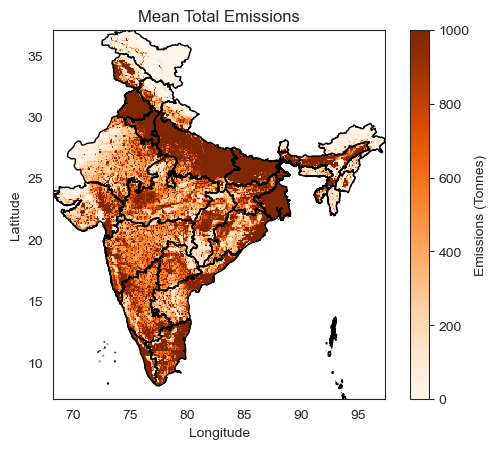

In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# Step 1: Open the clipped NetCDF file using context management
nc_file_path = 'H:/CO_IND/TOTALS_emi_nc/combined_total_emi_clipped_data.nc'
with xr.open_dataset(nc_file_path) as clipped_data:
    # Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
    shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
    india_shape = gpd.read_file(shapefile_path)

    # Manually specify the CRS based on your knowledge
    nc_crs = 'EPSG:4326'

    # Reproject the shapefile to match the CRS of the NetCDF data
    india_shape = india_shape.to_crs(nc_crs)

    # Step 3: Extract the TOTAL_EMISSIONS variable
    total_emissions = clipped_data['emissions']

    # Step 4: Calculate the time mean of the emissions data
    total_emissions_mean = total_emissions.mean(dim='time')

    # Step 5: Slice the data along the latitude and longitude ranges
    lat_range = slice(7, 39)  # Latitude range from 8 to 38
    lon_range = slice(66, 99)  # Longitude range from 67 to 98
    total_emissions_sliced = total_emissions_mean.sel(lat=lat_range, lon=lon_range)

    # Step 6: Plot the sliced TOTAL_EMISSIONS variable with a different colormap
    fig, ax = plt.subplots()
    im = total_emissions_sliced.plot(ax=ax, vmin=0, vmax=1000, cmap='Oranges', add_colorbar=False)

    # Add country boundaries in black color
    india_shape.boundary.plot(ax=ax, linewidth=1, color='black')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Emissions (Tonnes)')  # Set the colorbar label to show units as "Tonnes"

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Mean Total Emissions')

    # Show plot
    plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_13908\3887237258.py:19: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  nc_data['time'] = ('time', time_array)
C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_13908\3887237258.py:19: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray

The slope of the trend line is: 23.5500


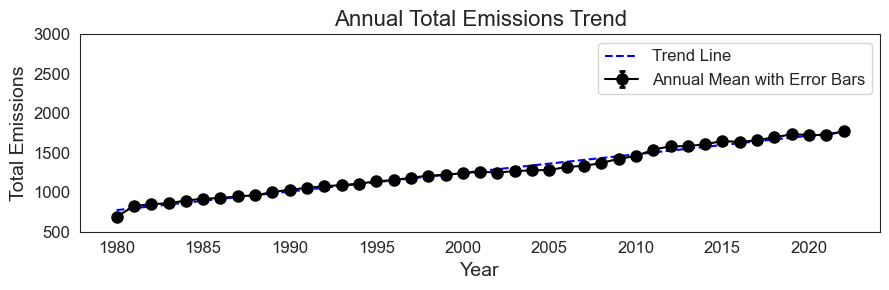

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Define your latitude and longitude ranges
lat_range = slice(-90, 90)  # Adjust as needed
lon_range = slice(-180, 180)  # Adjust as needed

# Load NetCDF file and extract latitude and longitude ranges
nc_file_path = 'H:/CO_IND/TOTALS_emi_nc/combined_total_emi_clipped_data.nc'
nc_data = xr.open_dataset(nc_file_path)

# Create a datetime array based on the starting year and month
start_year = 1980
time_array = np.array([np.datetime64(f"{start_year + i}-01-01") for i in range(len(nc_data['time']))])

# Add time array to the dataset
nc_data['time'] = ('time', time_array)

# Extract the TOTAL_EMISSIONS variable
total_emissions = nc_data['emissions'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2022
total_emissions = total_emissions.sel(time=slice('1980-01-01', '2022-01-01'))

# Resample the data to annual frequency and calculate the mean
annual_data = total_emissions.resample(time='1Y').mean()

# Calculate annual mean and standard error
annual_mean = annual_data.mean(dim=('lat', 'lon'))
annual_std_err = annual_data.std(dim=('lat', 'lon')) / np.sqrt(len(annual_data['lat']) * len(annual_data['lon']))

# Prepare data for plotting
x = np.arange(1980, 2023)  # Adjust the end year to 2022 to match the length of y
y = annual_mean.values  # Annual mean data
yerr = annual_std_err.values  # Annual standard error data

# Fit a polynomial regression line (linear regression)
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Print the slope of the trend line
slope = coefficients[0]
print(f"The slope of the trend line is: {slope:.4f}")

# Plotting
plt.figure(figsize=(9, 3))
sns.set_style("white")  # Set seaborn style for better aesthetics

# Plot data with error bars
plt.errorbar(x, y,
             yerr=yerr,
             fmt='-o',
             color='black',  # Line color
             ecolor='black',  # Error bar color
             capsize=2,  # Size of error bar caps
             elinewidth=2,  # Width of error bar lines
             capthick=2,  # Thickness of error bar caps
             markersize=8,  # Size of markers
             label='Annual Mean with Error Bars')

# Plot trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('Annual Total Emissions Trend', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Emissions', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2023, 5), fontsize=12)
plt.yticks(fontsize=12)

# Set ymin and ymax for y-axis based on your data range
plt.ylim(500, 3000)

# Show plot
plt.tight_layout()
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_13908\3898886992.py:19: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  nc_data['time'] = ('time', time_array)
C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_13908\3898886992.py:19: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray

The slope of the trend line is: 23.5500


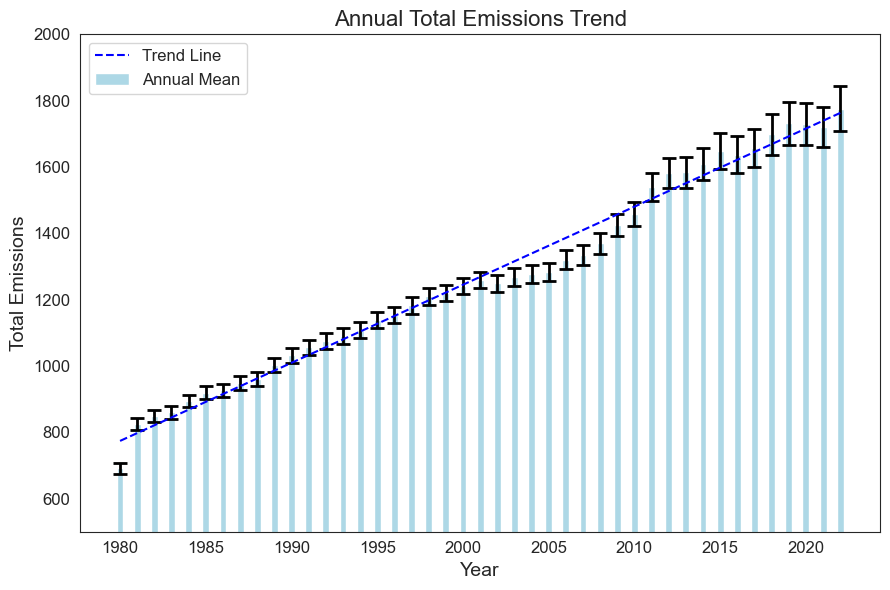

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Define your latitude and longitude ranges
lat_range = slice(-90, 90)  # Adjust as needed
lon_range = slice(-180, 180)  # Adjust as needed

# Load NetCDF file and extract latitude and longitude ranges
nc_file_path = 'H:/CO_IND/TOTALS_emi_nc/combined_total_emi_clipped_data.nc'
nc_data = xr.open_dataset(nc_file_path)

# Create a datetime array based on the starting year and month
start_year = 1980
time_array = np.array([np.datetime64(f"{start_year + i}-01-01") for i in range(len(nc_data['time']))])

# Add time array to the dataset
nc_data['time'] = ('time', time_array)

# Extract the TOTAL_EMISSIONS variable
total_emissions = nc_data['emissions'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2022
total_emissions = total_emissions.sel(time=slice('1980-01-01', '2022-01-01'))

# Resample the data to annual frequency and calculate the mean
annual_data = total_emissions.resample(time='1Y').mean()

# Calculate annual mean and standard error
annual_mean = annual_data.mean(dim=('lat', 'lon'))
annual_std_err = annual_data.std(dim=('lat', 'lon')) / np.sqrt(len(annual_data['lat']) * len(annual_data['lon']))

# Prepare data for plotting
x = np.arange(1980, 2023)  # Adjust the end year to 2022 to match the length of y
y = annual_mean.values  # Annual mean data

# Calculate 95% confidence interval
confidence_interval = 1.96 * annual_std_err

# Fit a polynomial regression line (linear regression)
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Print the slope of the trend line
slope = coefficients[0]
print(f"The slope of the trend line is: {slope:.4f}")

# Plotting
plt.figure(figsize=(9, 6))
sns.set_style("white")  # Set seaborn style for better aesthetics

# Define the width of the bars
bar_width = 0.4

# Plot bars with error bars
plt.bar(x, y, color='lightblue', width=bar_width, label='Annual Mean')
plt.errorbar(x, y, yerr=confidence_interval,
             fmt='none', ecolor='black', capsize=5, elinewidth=2, capthick=2)

# Plot trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('Annual Total Emissions Trend', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Emissions', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2023, 5), fontsize=12)
plt.yticks(fontsize=12)

# Set ymin and ymax for y-axis based on your data range
plt.ylim(500, 2000)

# Show plot
plt.tight_layout()
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_13908\1129772426.py:19: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  nc_data['time'] = ('time', time_array)
C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_13908\1129772426.py:19: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray

The slope of the trend line is: 23.5500


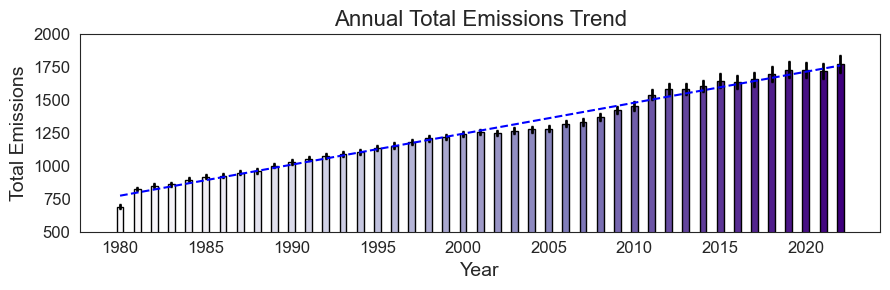

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Define your latitude and longitude ranges
lat_range = slice(-90, 90)  # Adjust as needed
lon_range = slice(-180, 180)  # Adjust as needed

# Load NetCDF file and extract latitude and longitude ranges
nc_file_path = 'H:/CO_IND/TOTALS_emi_nc/combined_total_emi_clipped_data.nc'
nc_data = xr.open_dataset(nc_file_path)

# Create a datetime array based on the starting year and month
start_year = 1980
time_array = np.array([np.datetime64(f"{start_year + i}-01-01") for i in range(len(nc_data['time']))])

# Add time array to the dataset
nc_data['time'] = ('time', time_array)

# Extract the TOTAL_EMISSIONS variable
total_emissions = nc_data['emissions'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2022
total_emissions = total_emissions.sel(time=slice('1980-01-01', '2022-01-01'))

# Resample the data to annual frequency and calculate the mean
annual_data = total_emissions.resample(time='1Y').mean()

# Calculate annual mean and standard error
annual_mean = annual_data.mean(dim=('lat', 'lon'))
annual_std_err = annual_data.std(dim=('lat', 'lon')) / np.sqrt(len(annual_data['lat']) * len(annual_data['lon']))

# Prepare data for plotting
x = np.arange(1980, 2023)  # Adjust the end year to 2022 to match the length of y
y = annual_mean.values  # Annual mean data

# Calculate 95% confidence interval
confidence_interval = 1.96 * annual_std_err

# Fit a polynomial regression line (linear regression)
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Print the slope of the trend line
slope = coefficients[0]
print(f"The slope of the trend line is: {slope:.4f}")

# Plotting
plt.figure(figsize=(9, 3))
sns.set_style("white")  # Set seaborn style for better aesthetics

# Define the width of the bars
bar_width = 0.4

# Plot bars with error bars
colors = plt.cm.Purples(np.linspace(0, 1, len(x)))
for i in range(len(x)):
    plt.bar(x[i], y[i], color=colors[i], width=bar_width, label='Annual Mean', edgecolor='black')
    plt.errorbar(x[i], y[i], yerr=confidence_interval[i],
                 fmt='none', ecolor='black', capsize=1, elinewidth=2, capthick=1)

# Plot trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('Annual Total Emissions Trend', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Emissions', fontsize=14)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2023, 5), fontsize=12)
plt.yticks(fontsize=12)

# Set ymin and ymax for y-axis based on your data range
plt.ylim(500, 2000)

# Show plot
plt.tight_layout()
plt.show()


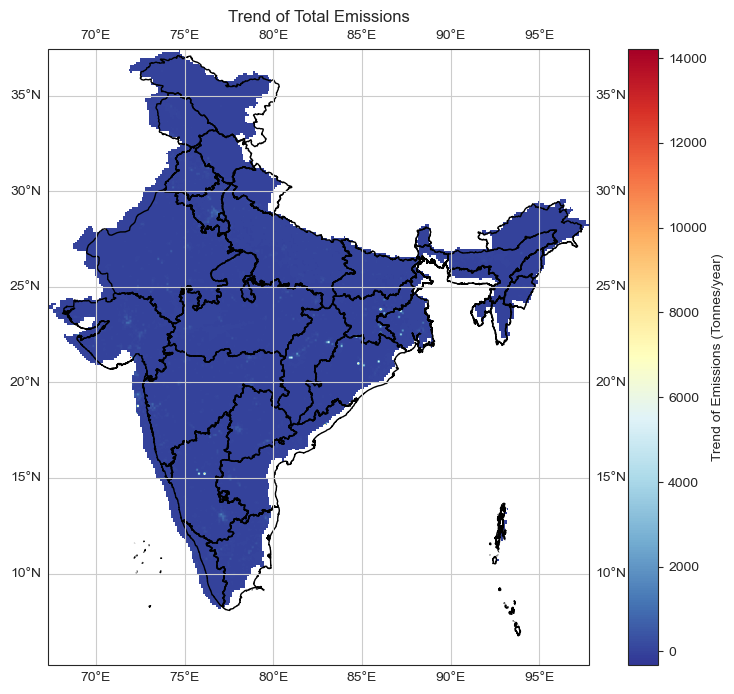

In [80]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
from scipy import stats

# Step 1: Open the clipped NetCDF file using context management
nc_file_path = 'H:/CO_IND/TOTALS_emi_nc/combined_total_emi_clipped_data.nc'
with xr.open_dataset(nc_file_path) as clipped_data:
    # Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
    shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
    india_shape = gpd.read_file(shapefile_path)

    # Manually specify the CRS based on your knowledge
    nc_crs = 'EPSG:4326'

    # Reproject the shapefile to match the CRS of the NetCDF data
    india_shape = india_shape.to_crs(nc_crs)

    # Step 3: Extract the TOTAL_EMISSIONS variable
    total_emissions = clipped_data['emissions']

    # Step 4: Calculate the trend of emissions over time
    lat_range = slice(8, 37.44)  # Latitude range from 7 to 39
    lon_range = slice(67.3, 97.8)  # Longitude range from 66 to 99
    total_emissions_sliced = total_emissions.sel(lat=lat_range, lon=lon_range)

    time = np.arange(len(total_emissions_sliced['time']))
    trend = np.empty(total_emissions_sliced.shape[1:])

    for lat_idx, lat in enumerate(total_emissions_sliced['lat']):
        for lon_idx, lon in enumerate(total_emissions_sliced['lon']):
            emissions_values = total_emissions_sliced[:, lat_idx, lon_idx].values
            slope, intercept, _, _, _ = stats.linregress(time, emissions_values)
            trend[lat_idx, lon_idx] = slope

    # Step 5: Plotting
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Plot the trend
    im = ax.imshow(trend, cmap='RdYlBu_r', transform=ccrs.PlateCarree(), extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower')

    # Add country boundaries in black color
    india_shape.boundary.plot(ax=ax, linewidth=1, color='black')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
    cbar.set_label('Trend of Emissions (Tonnes/year)')  # Set the colorbar label

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Trend of Total Emissions')

    # Add gridlines
    ax.gridlines(draw_labels=True)

    # Show plot
    plt.show()


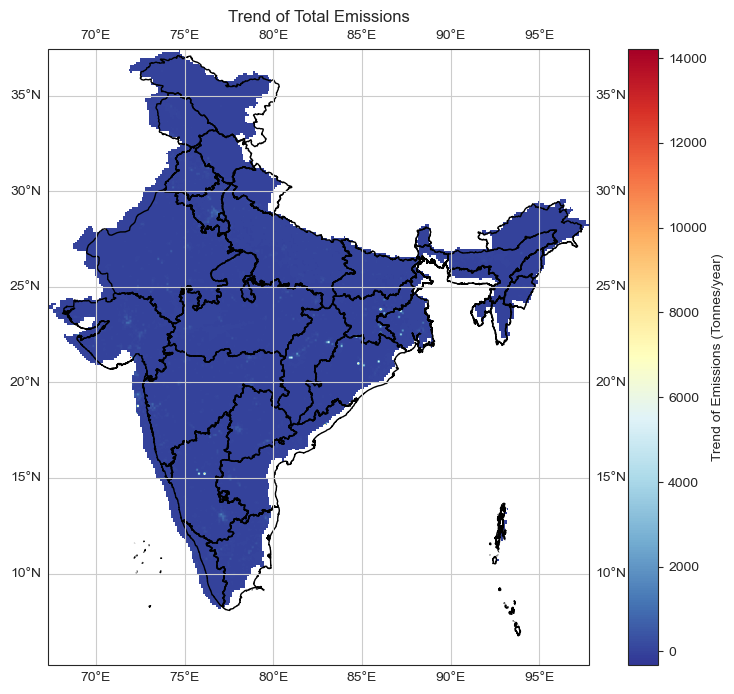

In [81]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
from scipy import stats

# File paths
nc_file_path = 'H:/CO_IND/TOTALS_emi_nc/combined_total_emi_clipped_data.nc'
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
output_nc_file_path = 'H:/CO_IND/TOTALS_emi_nc/trend.nc'

# Step 1: Open the clipped NetCDF file using context management
with xr.open_dataset(nc_file_path) as clipped_data:
    # Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
    india_shape = gpd.read_file(shapefile_path)
    
    # Manually specify the CRS based on your knowledge
    nc_crs = 'EPSG:4326'
    
    # Reproject the shapefile to match the CRS of the NetCDF data
    india_shape = india_shape.to_crs(nc_crs)
    
    # Step 3: Extract the TOTAL_EMISSIONS variable
    total_emissions = clipped_data['emissions']
    
    # Step 4: Calculate the trend of emissions over time
    lat_range = slice(8, 37.44)  # Latitude range from 8 to 37.44
    lon_range = slice(67.3, 97.8)  # Longitude range from 67.3 to 97.8
    total_emissions_sliced = total_emissions.sel(lat=lat_range, lon=lon_range)
    
    time = np.arange(len(total_emissions_sliced['time']))
    trend = np.empty(total_emissions_sliced.shape[1:])
    
    for lat_idx, lat in enumerate(total_emissions_sliced['lat']):
        for lon_idx, lon in enumerate(total_emissions_sliced['lon']):
            emissions_values = total_emissions_sliced[:, lat_idx, lon_idx].values
            slope, intercept, _, _, _ = stats.linregress(time, emissions_values)
            trend[lat_idx, lon_idx] = slope
    
    # Save trend to a new NetCDF file
    trend_data = xr.DataArray(trend, dims=('lat', 'lon'), coords={'lat': total_emissions_sliced['lat'], 'lon': total_emissions_sliced['lon']})
    trend_dataset = xr.Dataset({'trend': trend_data})
    trend_dataset.to_netcdf(output_nc_file_path)

    # Step 5: Plotting
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot the trend
    im = ax.imshow(trend, cmap='RdYlBu_r', transform=ccrs.PlateCarree(), extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower')
    
    # Add country boundaries in black color
    india_shape.boundary.plot(ax=ax, linewidth=1, color='black')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
    cbar.set_label('Trend of Emissions (Tonnes/year)')  # Set the colorbar label
    
    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Trend of Total Emissions')
    
    # Add gridlines
    ax.gridlines(draw_labels=True)
    
    # Show plot
    plt.show()


In [ ]:
#                                                FIRE

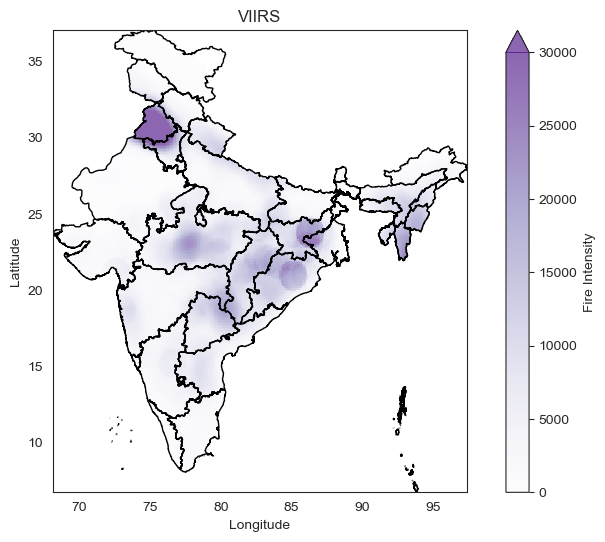

In [79]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray

# Define file paths
nc_file_path = 'H:/CO_IND/FOREST/nc/VIIRS.nc'
shapefile_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'

# Define vmin and vmax for the color scale
vmin = 0  # Minimum value for the color scale (adjust as needed)
vmax = 100  # Maximum value for the color scale (adjust as needed)

# Step 1: Open the NetCDF file and load the "fire" variable
with xr.open_dataset(nc_file_path) as clipped_data:
    fire_data = clipped_data['fire']
    
    # Ensure the NetCDF data has a CRS (using rioxarray to manage CRS information)
    if not clipped_data.rio.crs:
        clipped_data = clipped_data.rio.write_crs('EPSG:4326')  # Example CRS, replace with the actual CRS of your NetCDF data

    # Step 2: Load the shapefile and reproject it to match the CRS of the NetCDF data
    shape_data = gpd.read_file(shapefile_path)
    if shape_data.crs != clipped_data.rio.crs:
        shape_data = shape_data.to_crs(clipped_data.rio.crs)

    # Step 3: Plot the "fire" variable with the shapefile boundaries
    plt.figure(figsize=(10, 6))
    fire_data.plot(cmap='Purples', cbar_kwargs={'label': 'Fire Intensity'}, vmin=0, vmax=30000, alpha=0.6)
    shape_data.boundary.plot(edgecolor='black', linewidth=1, ax=plt.gca())
    plt.title('VIIRS')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(False)
    plt.show()



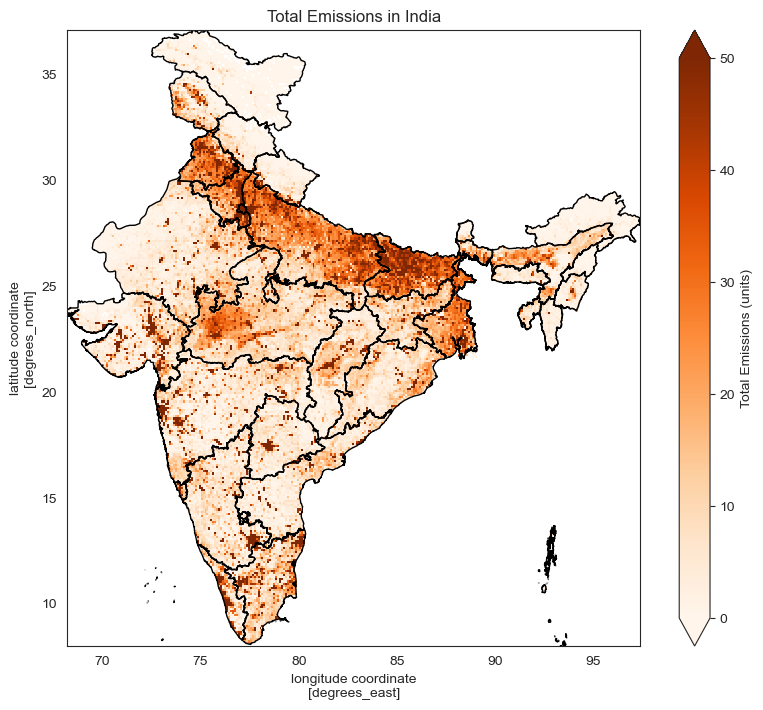

In [91]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# Step 1: Open the clipped NetCDF file
clipped_data = xr.open_dataset('H:/CO_IND/emi_trend/trend.nc')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# Assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Extract the TOTAL_EMISSIONS variable
total_emissions = clipped_data['em']

# Print the coordinate information for debugging
#print("NetCDF Data Variables:")
#print(clipped_data)

# Step 4: Plot the TOTAL_EMISSIONS variable with a different colormap
fig, ax = plt.subplots(figsize=(10, 8))
im = total_emissions.plot(ax=ax, vmin=0, vmax=50, cmap='Oranges', cbar_kwargs={'label': 'Total Emissions (units)'})

# Add country boundaries in black color
india_shape.boundary.plot(ax=ax, linewidth=1, color='black')

# Set title with the unit for total emissions
ax.set_title('Total Emissions in India')

plt.show()
